In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
from IPython.display import clear_output
import gym
import time
from utils import *

## [OpenAI Gym](http://gym.openai.com/)
Gym 是研究强化学习的高效工具，通过抽象了环境和agent之间的交互，节省了用户针对特定环境进行强化学习设置的时间。内置有大量的游戏环境，方便对算法的效果进行分析。

环境的官方解释和分数榜
[OpenAI Gym in GitHub](https://github.com/openai/gym)

### 1. Example
下面的例子是 Gym 内部一个的竖杆子的游戏环境，Gym 内置有大量的游戏环境以供选择
重要的 API 需要注意
* `gym.make(env_name)`: 生成环境
* `env.reset()`: 初始化环境，返回出事的状态 observation
* `env.render(mode='rgb_array')`: 显示环境
* `env.action_space().sample()`: 返回一个预定义的动作
* `env.step(action)`: 执行动作获得对应的下一步状态，奖励和是否完成的标志

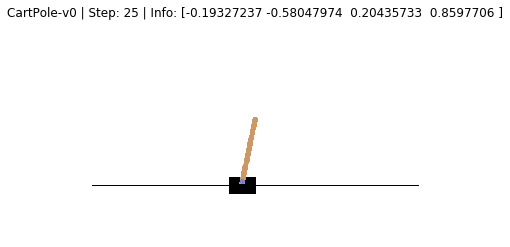

In [2]:
env = gym.make('CartPole-v0')    # create the environment, try other envs such as MountainCar-v0
observation = env.reset()

cum_reward, info = 0, None
for t in range(1000):
    env.render(mode = 'rgb_array')    # run the environment
    
    show_state(env, t, observation)     # show the result
    time.sleep(0.1)
    
    action = env.action_space.sample()    # take a random action
    observation, reward, done, info = env.step(action)    # act
    
    if done:
        print(f'End after {t} steps')
        break

clear_output(wait=True)

### 2. Noted
在这里我们再次重新的说明强化学习中的一些非常重要的细节和概念，上面我们说到了 `env.step` 方法会返回下一步状态，该行动的奖励，是否结束的标志等信息，下面介绍一下这些信息再我们强化学习问题中的作用。
* 状态 `Observation`: 当前的 `action` 执行完之后，系统的状态
* 奖励 `Reward`: 执行上一步动作之后，`agent`可以获得的奖励大小，强化学习的目标就是让累积奖励和最大化
* 标志 `Done`: 当前的环境是否结束，如果是需要 `env.reset` 重置环境，一般 `Done=True` 的时候就是一个(游戏)的回合结束。
* 信息 `Info`: 调试信息，部分复杂环境需要这部分信息

上面的这几个重要的信息对应的就是强化学习中最基本的执行流程
![rl-settings](./image/rl-settings.jpeg)
最后我们还需要注意一个概念，叫做动作空间，在强化学习的每一个环境中，有两个基本的"空间"，不同的环境，对应的这两个空间就不一样
* 观测空间 `observation space`:描述环境的所有可能的状态
* 动作空间 `action space`: 描述`agent`在环境下所有可能的动作行为

In [5]:
env = gym.make("LunarLander-v2")
print(env.action_space)
print(env.observation_space)

Discrete(4)
Box(8,)


其中 `Discrete(2)` 表示是离散的整数类型，范围是 $\{0, 1\}$，在当前的竖杆子的环境中表示向左或者向右两种动作。
其中 `Box(4)` 表示的是一个 `n` 维的盒子，描述的是状态的特征，比如在当前的竖杆子的环境种，表示的就是车的位置，杆子的角度，车的速度，杆子倾斜的角度。

### 3. Environment
查看所有支持的环境，并且 gym 支持用户自己编写对应的环境并将其写入这个注册表中以供之后使用

In [4]:
from gym import envs
print(len(envs.registry.all()))
print(list(envs.registry.all())[:10])

859
[EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0)]
